In [ ]:
import numpy as np

from IPython.display import HTML

from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt
%matplotlib inline

## Prepare uma animação de 12 segundos em que o polígono apresentado na figura faz 4 voltas completas em torno do próprio centro e triplica de tamanho entre o primeiro e o último frame da animação. Envie apenas o arquivo de vídeo correspondente à animação.

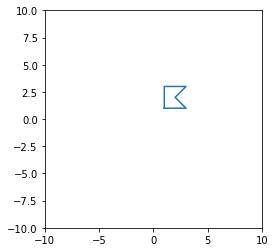

In [ ]:

figure, axis = plt.subplots()

axis.set_aspect('equal')  # x e y tem a mesma proporção
axis.set_xlim((-10, 10))
axis.set_ylim((-10, 10))

poligono = np.array([
        [1, 1, 1],
        [1, 3, 1],
        [3, 3, 1],
        [2, 2, 1],
        [3, 1, 1],
        [1, 1, 1]
])

line_poligono, = axis.plot(poligono[:,0], poligono[:,1])


In [ ]:
# Rotacionar e escalona o poligono

def rotaciona_poligono(angulo, poligono):
    xcentro, ycentro, um = np.mean(poligono[:-1], axis=0)

    ida_ao_centro = np.array([
                [1,   0,  0],
                [0,   1,  0],
                [-xcentro, -ycentro, um]])

    volta_ao_centro = np.array([
                [1,   0,  0],
                [0,   1,  0],
                [xcentro, ycentro, um]])

    rotacao = np.array([[np.cos(angulo),  np.sin(angulo), 0],
                        [-np.sin(angulo), np.cos(angulo), 0],
                        [0,               0,              1]]).T

    poligono = np.matmul(poligono, ida_ao_centro)
    poligono = np.matmul(poligono, rotacao)
    poligono = np.matmul(poligono, volta_ao_centro)

    return poligono


def escalona_poligono(poligono, sx, sy):
    xc, yc, um = np.mean(poligono[:-1], axis=0)

    ida_ao_centro = np.array([
            [1,    0,  0],
            [0,    1,  0],
            [-xc, -yc, um]])

    volta_do_centro = np.array([
                [1, 0,   0],
                [0, 1,   0],
                [xc, yc, um]])

    escalonamento = np.array([
                [sx, 0, 0], 
                [0, sy, 0],
                [0, 0, 1]])
    
        
    poligono = np.matmul(poligono, ida_ao_centro)
    poligono = np.matmul(poligono, escalonamento)
    poligono = np.matmul(poligono, volta_do_centro)

    return poligono


In [ ]:

# initialization function: plot the background of each frame
def init():
    x_poligono = poligono[:,0]
    y_poligono = poligono[:,1]


    line_poligono.set_data(x_poligono, y_poligono)
    line_poligono.set_color('brown')

    return (line_poligono,)


In [ ]:

# animation function. This is called sequentially
def animate(i):
    global poligono

    angulo_total = np.deg2rad(360)
    N_frames = 600
    angulo = angulo_total / (N_frames // 4)

    sx = 3
    sy = 1

    sx_per_frame = i * ((sx) / N_frames)
    sy_per_frame = i * ((sy) / N_frames)

    poligono = rotaciona_poligono(angulo, poligono)
    #poligono = escalona_poligono(poligono, sx_per_frame, sy_per_frame)
    
    poligono_x = poligono[:,0]
    poligono_y = poligono[:,1]

    line_poligono.set_data(poligono_x, poligono_y)

    return (line_poligono,)
    

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(figure, animate, init_func=init,
                     frames=600, interval=20, blit=True)

In [ ]:
HTML(anim.to_html5_video())